In [33]:
# import the important libraries
import pandas as pd
from collections import deque
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
from sklearn import preprocessing
%matplotlib inline 

# Reading data and cleaning data

In [34]:
#read the data from the Hitorical Cryptocurreny kaggle dataset
#read data in df coin_Bitcoin
#read data in df1 coin_Dogecoin
#read data in df2 coin_Ethereum
#read data in df3 coin_Litecoin
df=pd.read_csv("Desktop/crypto_data/coin_Bitcoin.csv")
df1=pd.read_csv("Desktop/crypto_data/coin_Dogecoin.csv")
df2=pd.read_csv("Desktop/crypto_data/coin_Ethereum.csv")
df3=pd.read_csv("Desktop/crypto_data/coin_Litecoin.csv")

#Data preprosessing
#Convert data col into Date format
#read data in df Bitcoin

df['Date'] = pd.to_datetime(df['Date']).dt.date
df1['Date'] = pd.to_datetime(df1['Date']).dt.date
df2['Date'] = pd.to_datetime(df2['Date']).dt.date
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
#set data col as index
df.set_index("Date", inplace=True)
#choose close col as price prediction
df=df[["Close"]]
#remove all na val
df.dropna(inplace=True)


df1.set_index("Date", inplace=True)
df1=df1[["Close"]]
df1.dropna(inplace=True)


df2.set_index("Date", inplace=True)
df2=df2[["Close"]]
df2.dropna(inplace=True)


df3.set_index("Date", inplace=True)
df3=df3[["Close"]]
df3.dropna(inplace=True)



# Ploting Data

Text(0.5, 1.0, 'Price coin_Bitcoin')

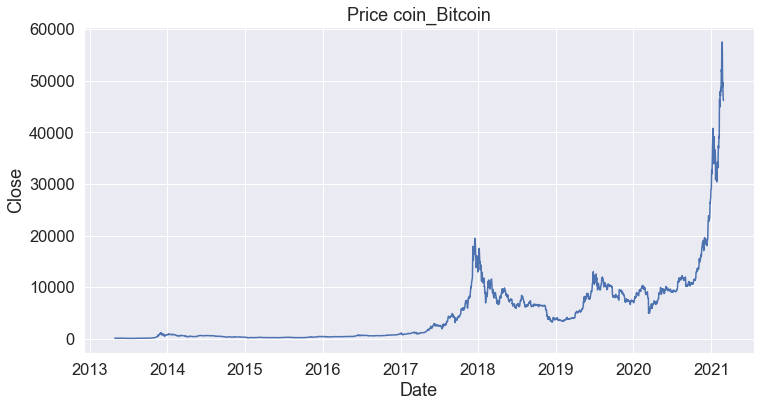

In [35]:
#plot the close price of coin_Bitcoin
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="Close", data=df).set_title("Price coin_Bitcoin")


Text(0.5, 1.0, 'Price coin_Dogecoin')

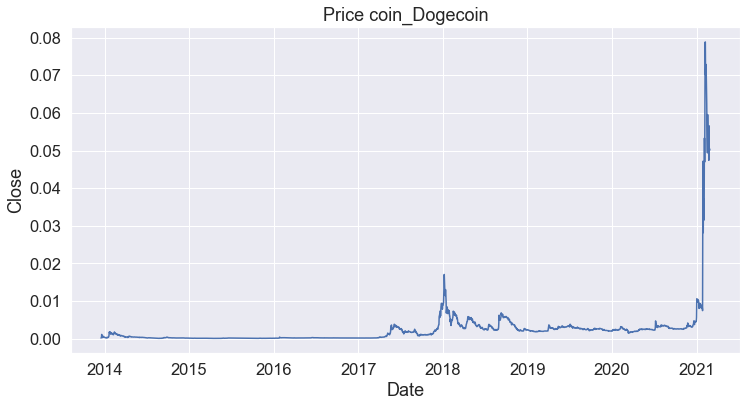

In [36]:
#plot the close price of coin_Dogecoin

plt.figure(figsize=(12,6))
sns.lineplot(x=df1.index, y="Close", data=df1).set_title("Price coin_Dogecoin")


Text(0.5, 1.0, 'Price coin_Ethereum')

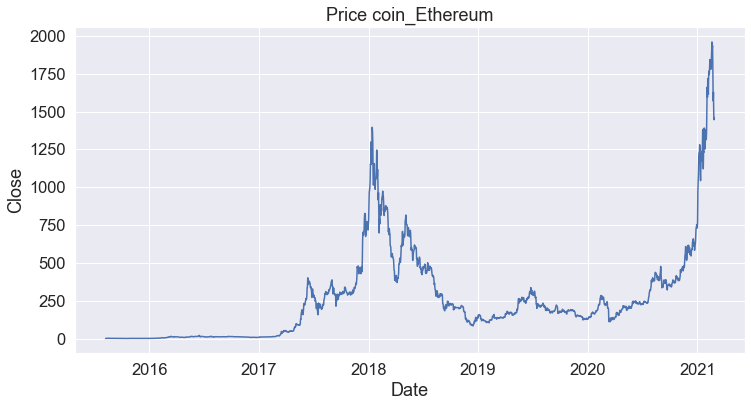

In [37]:
#plot the close price of coin_Ethereum

plt.figure(figsize=(12,6))
sns.lineplot(x=df2.index, y="Close", data=df2).set_title("Price coin_Ethereum")


Text(0.5, 1.0, 'Price coin_Litecoin')

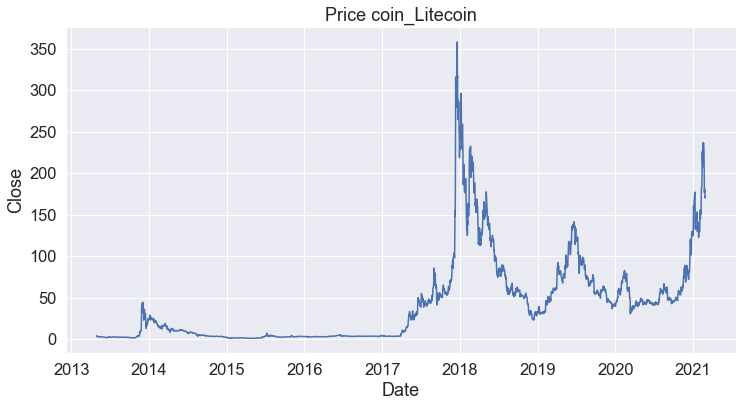

In [38]:
#plot the close price of coin_Litecoin

plt.figure(figsize=(12,6))
sns.lineplot(x=df3.index, y="Close", data=df3).set_title("Price coin_Litecoin")

# Data Preprocessing
Organize the data sequence of previous 150 days is used to predict the value at time t

In [39]:
data = df.iloc[:, 0]
hist = []
target = []
length = 150
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [40]:
data1 = df1.iloc[:, 0]
hist1 = []
target1 = []
length1 = 150
for i in range(len(data1)-length1):
    x1 = data1[i:i+length1]
    y1 = data1[i+length1]
    hist1.append(x1)
    target1.append(y1)

In [41]:
data2 = df2.iloc[:, 0]
hist2 = []
target2 = []
length2 = 150
for i in range(len(data2)-length2):
    x2 = data2[i:i+length2]
    y2 = data2[i+length2]
    hist2.append(x2)
    target2.append(y2)

In [42]:
data3 = df3.iloc[:, 0]
hist3 = []
target3 = []
length3 = 150
for i in range(len(data3)-length3):
    x3 = data3[i:i+length3]
    y3 = data3[i+length3]
    hist3.append(x3)
    target3.append(y3)

In [43]:
print(hist[1][149])
print(data[150])
print(target[0])

print(hist1[1][149])
print(data1[150])
print(target1[0])

print(hist2[1][149])
print(data2[150])
print(target2[0])

print(hist3[1][149])
print(data3[150])
print(target3[0])

128.3800048828125
128.3800048828125
128.3800048828125
0.00045475899241864676
0.00045475899241864676
0.00045475899241864676
0.9501760005950928
0.9501760005950928
0.9501760005950928
2.391720056533813
2.391720056533813
2.391720056533813


In [44]:
#Hist and target are lists. We need to convert them to numpy arrays and reshape the target variable.
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

hist1 = np.array(hist1)
target1 = np.array(target1)
target1 = target1.reshape(-1,1)

hist2 = np.array(hist2)
target2 = np.array(target2)
target2 = target2.reshape(-1,1)

hist3 = np.array(hist3)
target3 = np.array(target3)
target3 = target3.reshape(-1,1)

In [45]:
#Normalizing can be done by applying a simple math equation or just using a function like MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

hist_scaled1 = sc.fit_transform(hist1)
target_scaled1 = sc.fit_transform(target1)

hist_scaled2 = sc.fit_transform(hist2)
target_scaled2 = sc.fit_transform(target2)

hist_scaled3 = sc.fit_transform(hist3)
target_scaled3 = sc.fit_transform(target3)

In [46]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

hist_scaled1 = hist_scaled1.reshape((len(hist_scaled1), length1, 1))
print(hist_scaled1.shape)

hist_scaled2 = hist_scaled2.reshape((len(hist_scaled2), length2, 1))
print(hist_scaled2.shape)

hist_scaled3 = hist_scaled3.reshape((len(hist_scaled3), length3, 1))
print(hist_scaled3.shape)

(2712, 150, 1)
(2481, 150, 1)
(1881, 150, 1)
(2712, 150, 1)


# Training and Test Sets

In [47]:
X_train = hist_scaled[:1800,:,:]
X_test = hist_scaled[1800:,:,:]
y_train = target_scaled[:1800,:]
y_test = target_scaled[1800:,:]

X_train1 = hist_scaled1[:1800,:,:]
X_test1 = hist_scaled1[1800:,:,:]
y_train1 = target_scaled1[:1800,:]
y_test1 = target_scaled1[1800:,:]

X_train2 = hist_scaled2[:1600,:,:]
X_test2 = hist_scaled2[1600:,:,:]
y_train2 = target_scaled2[:1600,:]
y_test2 = target_scaled2[1600:,:]

X_train3 = hist_scaled3[:1800,:,:]
X_test3 = hist_scaled3[1800:,:,:]
y_train3 = target_scaled3[:1800,:]
y_test3 = target_scaled3[1800:,:]

# Building the Neural Network

In [48]:
#I will build a model with 3 LSTM layers and 1 dense layer which is the output layer.
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(150,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150, 32)           4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 150, 32)           8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


#  Optimizers "adam" and Loss "MSE" used

In [94]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [78]:
#Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32)
history1 = model.fit(X_train1, y_train1, epochs=15, batch_size=32)
history2 = model.fit(X_train2, y_train2, epochs=15, batch_size=32)
history3 = model.fit(X_train3, y_train3, epochs=15, batch_size=32)

Epoch 1/15
57/57 [==============================] - 19s 158ms/step - loss: 1.0793e-04
Epoch 2/15
57/57 [==============================] - 14s 240ms/step - loss: 1.1083e-04
Epoch 3/15
57/57 [==============================] - 12s 209ms/step - loss: 1.1103e-04
Epoch 4/15
57/57 [==============================] - 12s 210ms/step - loss: 1.0642e-04
Epoch 5/15
57/57 [==============================] - 12s 206ms/step - loss: 1.9763e-04
Epoch 6/15
57/57 [==============================] - 12s 206ms/step - loss: 9.5369e-05
Epoch 7/15
57/57 [==============================] - 14s 240ms/step - loss: 8.8875e-05
Epoch 8/15
57/57 [==============================] - 14s 239ms/step - loss: 1.1764e-04
Epoch 9/15
57/57 [==============================] - 13s 222ms/step - loss: 1.0168e-04
Epoch 10/15
57/57 [==============================] - 12s 216ms/step - loss: 9.6991e-05
Epoch 11/15
57/57 [==============================] - 12s 213ms/step - loss: 1.1224e-04
Epoch 12/15
57/57 [==============================] -

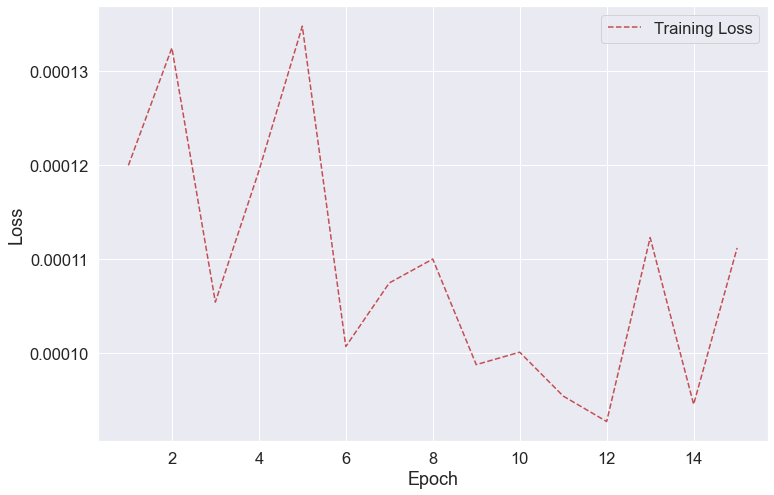

In [80]:
#Plot the training loss Bitcoin
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

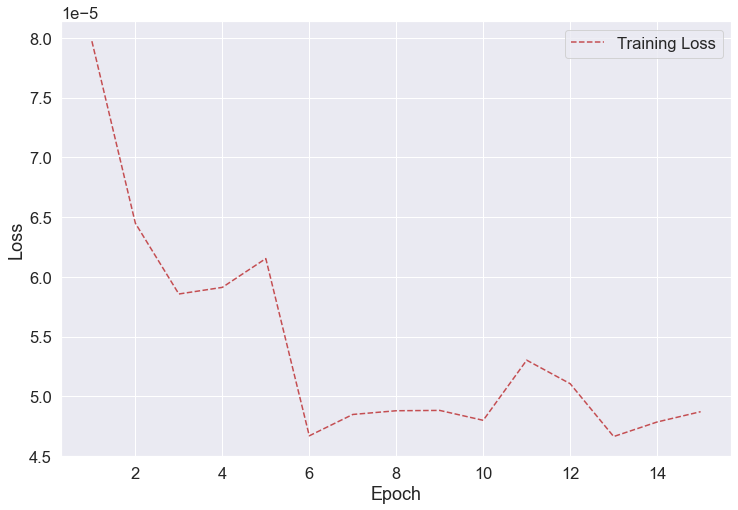

In [81]:
#Plot the training loss Dogecoin

loss = history1.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

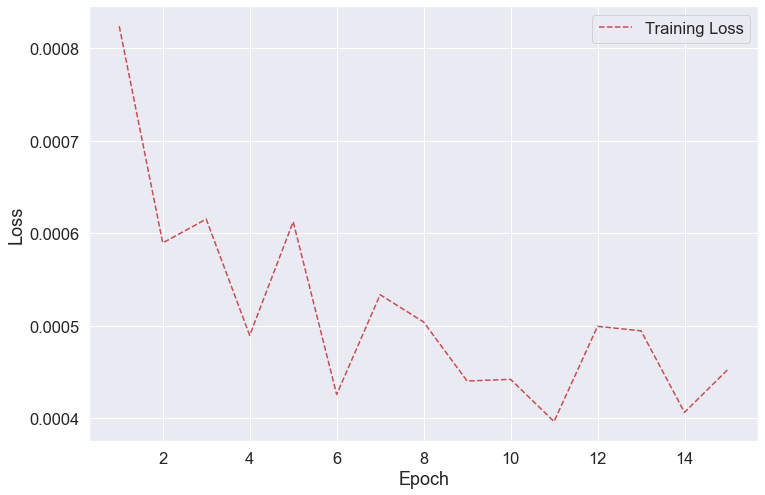

In [82]:
#Plot the training loss Ethereum

loss = history2.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

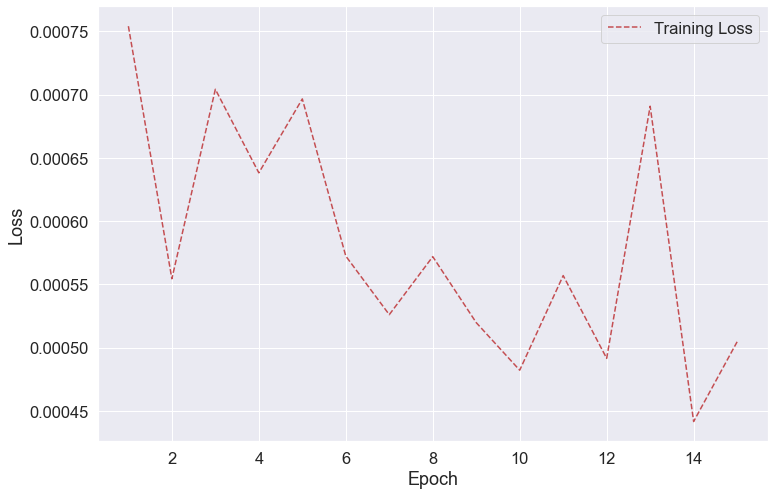

In [83]:
#Plot the training loss Litecoin

loss = history3.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

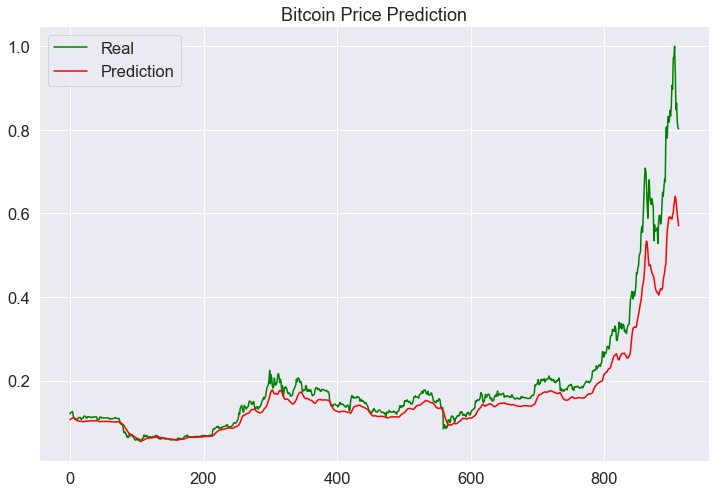

In [88]:
#plot the Real and prediction plot
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

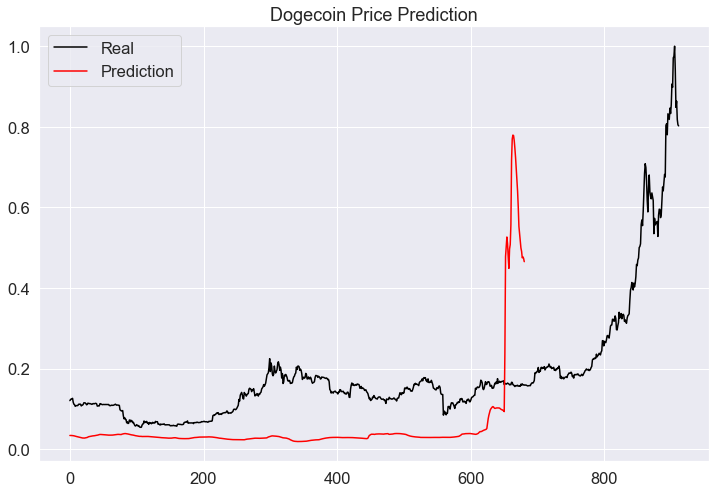

In [85]:
#plot the Real and prediction plot

pred = model.predict(X_test1)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='black', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Dogecoin Price Prediction')
plt.legend()
plt.show()

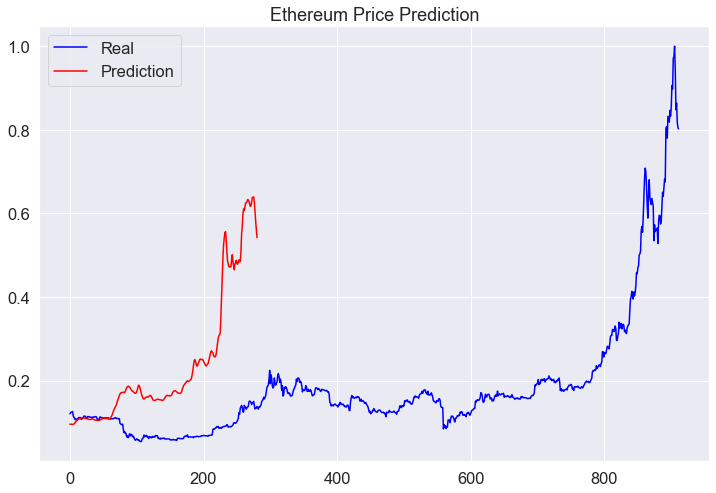

In [86]:
#plot the Real and prediction plot

pred = model.predict(X_test2)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

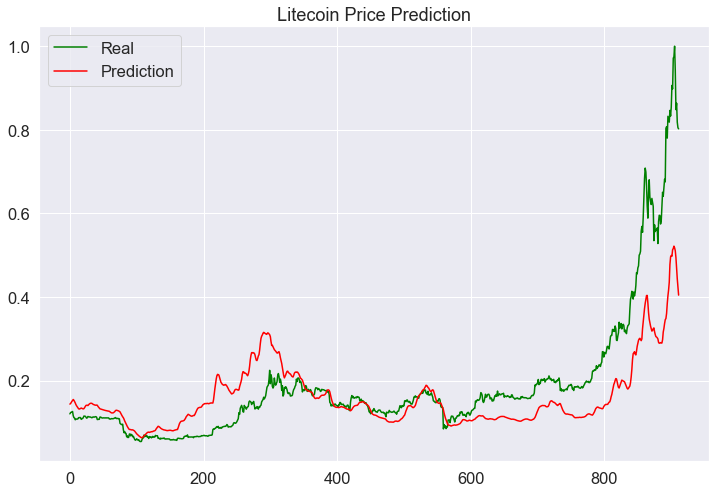

In [87]:
#plot the Real and prediction plot

pred = model.predict(X_test3)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()